In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_07_18_11_20220124_142519.jpg
/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_07_13_13_S25C-0i22071313490.jpg
/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_07_11_08_1578015666023.jpg
/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_07_22_17_Screenshot_20220706-015812_Gallery.jpg
/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_07_19_10_scan1545.jpg
/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_05_17_12_1652757775253890728962968463091.jpg
/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_07_13_11_20191113_115207.jpg
/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_05_17_09_Resized_20220517_091305(1).jpg
/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022

In [2]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.5/609.5 kB 20.5 MB/s eta 0:00:00


In [3]:
import os
working_dir = '/kaggle/working/'
yolo_data = '/kaggle/working/yolo_data'
if yolo_data not in working_dir:
    os.makedirs(yolo_data)
    print('directory created succsefullly')
else:
    print('not logic failed')

directory created succsefullly


In [4]:
yolo_data = '/kaggle/working/yolo_data'
training_data = '/kaggle/working/yolo_data/train'
val_data = '/kaggle/working/yolo_data/val'
if training_data not in yolo_data:
    os.makedirs(training_data)
    print('image directory created succsefullly')
else:
    print('image directory not created')
    
if val_data not in yolo_data:
    os.makedirs(val_data)
    print('label directory created')
else :
    print('label directory failed to create')

image directory created succsefullly
label directory created


In [5]:
import shutil
# copy all training img into working directory 
for file in os.listdir('/kaggle/input/business-registration-certificate-ocr/train_image/train_image'):
    source_path = '/kaggle/input/business-registration-certificate-ocr/train_image/train_image'+'/'+file
    dest_path = '/kaggle/working/yolo_data/train'+'/'+file
    shutil.copy(source_path,dest_path)
# now lets copy all validation image 
for file in os.listdir('/kaggle/input/business-registration-certificate-ocr/test_image/test_image'):
    source_path = '/kaggle/input/business-registration-certificate-ocr/test_image/test_image'+'/'+file
    dest_path = '/kaggle/working/yolo_data/val'+'/'+file
    shutil.copy(source_path,dest_path)
# we will folloew same procedure for val label and train label 
for file in os.listdir('/kaggle/input/business-registration-certificate-ocr/train_annotation/train_annotation'):
    source_path = '/kaggle/input/business-registration-certificate-ocr/train_annotation/train_annotation'+'/'+file
    dest_path = '/kaggle/working/yolo_data/train'+'/'+file
    shutil.copy(source_path,dest_path)
for file in os.listdir('/kaggle/input/business-registration-certificate-ocr/test_annotation/test_annotation'):
    source_path = '/kaggle/input/business-registration-certificate-ocr/test_annotation/test_annotation'+'/'+file
    dest_path = '/kaggle/working/yolo_data/val'+'/'+file
    shutil.copy(source_path,dest_path)

In [6]:
import os
import yaml

# Set the folder path where you want to create the YAML file
folder_path = "/kaggle/working/"  # Replace with the desired folder path

# Create the YAML file name and path
file_name = "dataset.yaml"  # Replace with the desired file name
file_path = os.path.join(folder_path, file_name)

# YAML content to be written in the file
yaml_content = {
    "path": '/kaggle/input/business-registration-certificate-ocr',
    "train": "/kaggle/working/yolo_data/train",
    "val": "/kaggle/working/yolo_data/val",
    'names':{0:'DOB',
             1:'DOR',
             2:'Business name',
             3:'Business add',
             4:'Business type',
             5:'Business cat',
             6:'Reg no '}
}

# Create the YAML file and write the content
with open(file_path, "w") as file:
    yaml.dump(yaml_content, file)

In [7]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4958.9/8062.4 GB disk)


In [8]:
os.makedirs('/kaggle/working/training_result')
folder_path = '/kaggle/working/training_result'

In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m.yaml')  # build a new model from YAML
model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8m.yaml').load('yolov8m.pt')  # build from YAML and transfer weights

# Train the model
model.train(data='/kaggle/working/dataset.yaml', epochs=20, imgsz=640,project = folder_path)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384


image 1/1 /kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_05_17_11_20220517_113137.jpg: 640x384 1 DOB, 1 DOR, 1 Business name, 1 Business add, 1 Business type, 1 Business cat, 1 Reg no , 81.0ms
Speed: 2.1ms preprocess, 81.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)


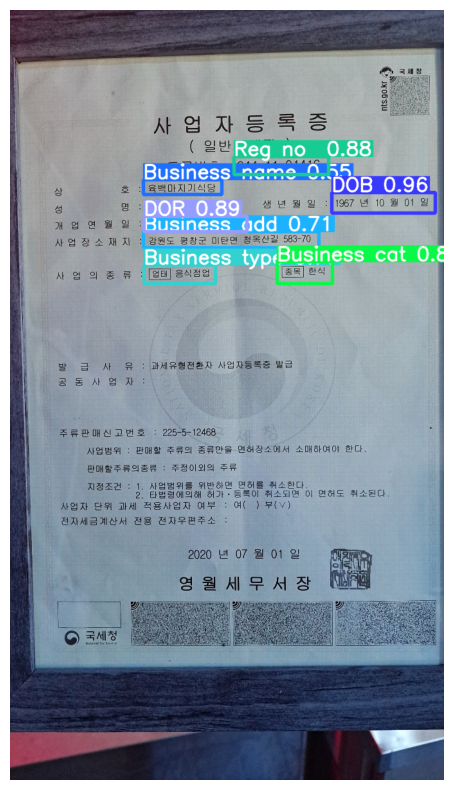

In [10]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m.pt')  # load an official model
model = YOLO('/kaggle/working/training_result/train/weights/best.pt')  # load a custom model

# Predict with the model
results = model('/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_05_17_11_20220517_113137.jpg')  # predict on an image

import matplotlib.pyplot as plt 


# Plot the image with increased figure size
res_plotted = results[0].plot()
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plt.imshow(res_plotted)
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

In [11]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m.pt') # Load an official model
model = YOLO('/kaggle/working/training_result/train/weights/best.pt') 

# Predict with the model
results = model('/kaggle/input/business-registration-certificate-ocr/test_image/test_image/2022_05_17_01_20220413_125934.jpg')  # Predict on an image

# Iterate through predictions for each image
for pred in results.pred[0]:
    class_id = pred[5].item()  # Get the class ID
    class_label = model.names[class_id]  # Get the class label
    bbox = pred[:4].tolist()  # Get the bounding box coordinates

    # Convert bbox from (xmin, ymin, xmax, ymax) to (x, y, width, height)
    x, y, x_max, y_max = bbox
    width = x_max - x
    height = y_max - y

    print(f"Class: {class_label}")
    print(f"Bounding Box (x, y, width, height): {x:.2f}, {y:.2f}, {width:.2f}, {height:.2f}")



image 1/1 /kaggle/input/business-registration-certificate-ocr/test_image/test_image/2022_05_17_01_20220413_125934.jpg: 640x640 1 DOB, 1 DOR, 1 Business name, 1 Business add, 1 Business type, 2 Business cats, 2 Reg no s, 13.8ms
Speed: 3.2ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: 'list' object has no attribute 'pred'

In [ ]:
print(results[0].boxes.data)

In [ ]:
from ultralytics import YOLO
import cv2

# Load a model
model = YOLO('yolov8m.pt')  # Load an official model

from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m.pt') # Load an official model
model = YOLO('/kaggle/working/training_result/train/weights/best.pt') 

# Predict with the model
results = model('/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_05_17_11_1610435209892 - Copy.jpg') 

# Load the original image
original_image = cv2.imread('/kaggle/input/business-registration-certificate-ocr/train_image/train_image/2022_05_17_11_1610435209892 - Copy.jpg')

# Iterate through the list of results
for detection in results[0].boxes.data:
    # Convert to integer
    x, y, xmax, ymax,conf,label = detection.int().tolist()
    # Crop the image
    cropped_image = original_image[y:ymax, x:xmax]
    # Display the cropped region using OpenCV
    # Display the cropped region using matplotlib
    plt.title(label)
    plt.figure(figsize=(5, 5))
    plt.imshow(cropped_image)
    
    # Add text for class label
    plt.text(5, 15, label, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
    
    plt.axis('off')
    plt.show()
    

